This is Will's edit of a notebook originally written by Javier.

# Correlations between H II region parameters

We look at correlations between 6 principal measurements that fall into two groups: 

* Basic parameters: 
    * Size: $L$
    * Ionizing luminosity: $Q(\mathrm{H})$
    * Distance: $D$
* Velocity structure function parameters:
    * Velocity dispersion on plane of sky: $\sigma$
    * Velocity autocorrelation length scale: $\ell_0$
    * Structure function slope in inertial range: $m$

Colab's markdown renderer seems to have a bug that requires some math outside of a list in order to trigger latex parsing: $\alpha$. 

## Original table from Javier

In [1]:
import time
start_time=time.time()
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import lmfit
import statsmodels.api as sm
import linmix
from scipy.stats import pearsonr
#import sys

In [2]:
Region =["NGC 604","NGC 595","Hubble X","Hubble V","30Dor" ,"Carina","NGC 346","M8"   ,"OrionL","OrionS"]
LHa    =[4.46e39  ,2.29e39  ,3.98e38   ,7.41e38   ,5.74e39 ,3.98e39 ,4.67e38  ,2.95e37,1e37    ,1e37    ]
SFR    =[5.3e-3   ,2.6e-3   ,3.1e-4    ,1.5e-4    ,1.3e-2  ,1.0e-2  ,0.0021   ,1.0e-4 ,5.3e-5  ,5.3e-5  ]
n      =[3        ,4        ,5         ,8         ,250     ,500     ,100      ,60     ,150     ,4000    ] 
Diam   =[400      ,400      ,160       ,130       ,98.9    ,5       ,64       , 25    ,5       ,0.6     ]
R      =[200      ,200      ,80        ,65        ,49.4    ,7.5     ,32       ,12.5   ,2.5     ,0.3     ]
Dist   =[840      ,840      ,500       ,500       ,50      ,2.35    ,61.7     ,1.25   ,0.4     ,0.4     ]
siglos =[16.21    ,18.33    ,12.3      ,13.4      ,31.7    ,22.46   ,10.2     ,13.6   ,6       ,6       ]
sigW   =[23.1     ,27.1     ,13.4      ,14.7      ,31.7    ,22.46   ,10.2     ,13.6   ,6       ,6       ]

Confidence intervals with sigma fixed

In [3]:
sig    =[7.39     ,6.64     ,2.8       ,3.59      ,15.8    ,4.22    ,5.6      ,2.7    ,3.23    ,3.1     ]
r0     =[8.75     ,8.99     ,3.62      ,2.7       ,2.69    ,0.53    ,1.4      ,1.78   ,0.84    ,0.062   ]
r0er   =[0.75     ,0.71     ,0.18      ,0.24      ,0.08    ,0.12    ,0.75     ,0.07   ,0.37    ,0.003   ]
m      =[1.95     ,1.75     ,1.7       ,1.62      , 1.22   ,1.19    ,1.13     ,1.36   ,0.9     ,1.44    ]
mer    =[0.14     ,0.10     ,0.09      ,0.11      ,0.02    ,0.20    ,0.03     ,0.05   ,0.04    ,0.11    ]

Confidence intervals with sigma float

In [4]:
sig2    =[43.46    ,36.56    ,12.77     ,7.88      ,300.67  ,19.99   ,38.01    ,7.29    ,5.28   ,6.68  ]
sig2er  =[5.05     ,3.36     ,0.69      ,0.72      ,27.97   ,3.08    ,3.69     ,0.72    ,12.3   ,0.53  ]
r02     =[6.9      ,8.04     ,3.61      ,2.78      ,3.4     ,0.54    ,1.89     ,1.78   ,0.6    ,0.042 ]
r02er   =[0.83     ,0.85     ,0.21      ,0.35      ,0.44    ,0.18    ,0.35     ,0.17   ,1.88   ,0.004 ]
m2      =[2.07     ,1.83     ,1.72      ,1.62      ,1.18    ,0.98    ,1.05     ,1.36   ,2.17   ,1.65  ]
m2er    =[0.23     ,0.12     ,0.16      ,0.28      ,0.02    ,0.37    ,0.04     ,0.13   ,1.78   ,0.07  ]

In [5]:
data = pd.DataFrame(
    {
       "Region": Region,
       "LHa": LHa,
       "SFR": SFR,
       "n": n,
       "L [pc]": Diam,
       "R [pc]": R,
       "Dist [kpc]": Dist,
       "sig [km/s]": sig,
       "sig2 [km/s]": sig2,
       "sig2er": sig2er,
       "m": m,
       "m2": m2,
       "mer": mer,
       "m2er": m2er,
       "r0 [pc]": r0,
       "r02 [pc]": r02,
       "r0er": r0er,
       "r02er": r02er,
       "siglos [km/s]": siglos,
      
    },
)

In [6]:
data['sig2 [km/s]']=data['sig2 [km/s]']**0.5

In [7]:
data['sig2er']=data['sig2er']**0.5

Checar que los tipos de las columnas sean adecuadas:

In [8]:
data.dtypes

Region            object
LHa              float64
SFR              float64
n                  int64
L [pc]           float64
R [pc]           float64
Dist [kpc]       float64
sig [km/s]       float64
sig2 [km/s]      float64
sig2er           float64
m                float64
m2               float64
mer              float64
m2er             float64
r0 [pc]          float64
r02 [pc]         float64
r0er             float64
r02er            float64
siglos [km/s]    float64
dtype: object

In [9]:
data

,Region,LHa,SFR,n,L [pc],R [pc],Dist [kpc],sig [km/s],sig2 [km/s],sig2er,m,m2,mer,m2er,r0 [pc],r02 [pc],r0er,r02er,siglos [km/s]
0,NGC 604,4.460000e+39,0.005300,3,400.0,200.0,840.00,7.39,6.592420,2.247221,1.95,2.07,0.14,0.23,8.750,6.900,0.750,0.830,16.21
1,NGC 595,2.290000e+39,0.002600,4,400.0,200.0,840.00,6.64,6.046487,1.833030,1.75,1.83,0.10,0.12,8.990,8.040,0.710,0.850,18.33
2,Hubble X,3.980000e+38,0.000310,5,160.0,80.0,500.00,2.80,3.573514,0.830662,1.70,1.72,0.09,0.16,3.620,3.610,0.180,0.210,12.30
3,Hubble V,7.410000e+38,0.000150,8,130.0,65.0,500.00,3.59,2.807134,0.848528,1.62,1.62,0.11,0.28,2.700,2.780,0.240,0.350,13.40
4,30Dor,5.740000e+39,0.013000,250,98.9,49.4,50.00,15.80,17.339839,5.288667,1.22,1.18,0.02,0.02,2.690,3.400,0.080,0.440,31.70
5,Carina,3.980000e+39,0.010000,500,5.0,7.5,2.35,4.22,4.471018,1.754993,1.19,0.98,0.20,0.37,0.530,0.540,0.120,0.180,22.46
6,NGC 346,4.670000e+38,0.002100,100,64.0,32.0,61.70,5.60,6.165225,1.920937,1.13,1.05,0.03,0.04,1.400,1.890,0.750,0.350,10.20
7,M8,2.950000e+37,0.000100,60,25.0,12.5,1.25,2.70,2.700000,0.848528,1.36,1.36,0.05,0.13,1.780,1.780,0.070,0.170,13.60
8,OrionL,1.000000e+37,0.000053,150,5.0,2.5,0.40,3.23,2.297825,3.507136,0.90,2.17,0.04,1.78,0.840,0.600,0.370,1.880,6.00
9,OrionS,1.000000e+37,0.000053,4000,0.6,0.3,0.40,3.10,2.584570,0.728011,1.44,1.65,0.11,0.07,0.062,0.042,0.003,0.004,6.00


## Change to log scale for most parameters

El analisis de la mayoría de las columnas sería mejor en escala logarítmica porque varían por varios ordenes de magnitud.  Entonces, hacemos una nueva versión de la tabla así. Dejamos la $m$ en escala lineal porque no varía mucho.

In [10]:
cols = data.columns
logdata = data.copy()
for col in cols:
    if col not in ["Region", "m", "mer","m2","m2er","r0er","r02er","sig2er"]:
        logdata[col] = np.round(np.log10(logdata[col]), 2)
        logdata.rename(columns={col: f"log {col}"}, inplace=True)
# Some minor changes to column names
logdata.rename(
    columns={
        "log LHa": "log L(H) [erg s^-1]",
        }, 
    inplace=True)
logdata

,Region,log L(H) [erg s^-1],log SFR,log n,log L [pc],log R [pc],log Dist [kpc],log sig [km/s],log sig2 [km/s],sig2er,m,m2,mer,m2er,log r0 [pc],log r02 [pc],r0er,r02er,log siglos [km/s]
0,NGC 604,39.65,-2.28,0.48,2.60,2.30,2.92,0.87,0.82,2.247221,1.95,2.07,0.14,0.23,0.94,0.84,0.750,0.830,1.21
1,NGC 595,39.36,-2.59,0.60,2.60,2.30,2.92,0.82,0.78,1.833030,1.75,1.83,0.10,0.12,0.95,0.91,0.710,0.850,1.26
2,Hubble X,38.60,-3.51,0.70,2.20,1.90,2.70,0.45,0.55,0.830662,1.70,1.72,0.09,0.16,0.56,0.56,0.180,0.210,1.09
3,Hubble V,38.87,-3.82,0.90,2.11,1.81,2.70,0.56,0.45,0.848528,1.62,1.62,0.11,0.28,0.43,0.44,0.240,0.350,1.13
4,30Dor,39.76,-1.89,2.40,2.00,1.69,1.70,1.20,1.24,5.288667,1.22,1.18,0.02,0.02,0.43,0.53,0.080,0.440,1.50
5,Carina,39.60,-2.00,2.70,0.70,0.88,0.37,0.63,0.65,1.754993,1.19,0.98,0.20,0.37,-0.28,-0.27,0.120,0.180,1.35
6,NGC 346,38.67,-2.68,2.00,1.81,1.51,1.79,0.75,0.79,1.920937,1.13,1.05,0.03,0.04,0.15,0.28,0.750,0.350,1.01
7,M8,37.47,-4.00,1.78,1.40,1.10,0.10,0.43,0.43,0.848528,1.36,1.36,0.05,0.13,0.25,0.25,0.070,0.170,1.13
8,OrionL,37.00,-4.28,2.18,0.70,0.40,-0.40,0.51,0.36,3.507136,0.90,2.17,0.04,1.78,-0.08,-0.22,0.370,1.880,0.78
9,OrionS,37.00,-4.28,3.60,-0.22,-0.52,-0.40,0.49,0.41,0.728011,1.44,1.65,0.11,0.07,-1.21,-1.38,0.003,0.004,0.78


Make the label text bigger on the figures

In [11]:
sns.set_context("talk")

Repeat the pair plot of correlations between columns with the log-scale quantities. Use color to indicate the distance to the regions.

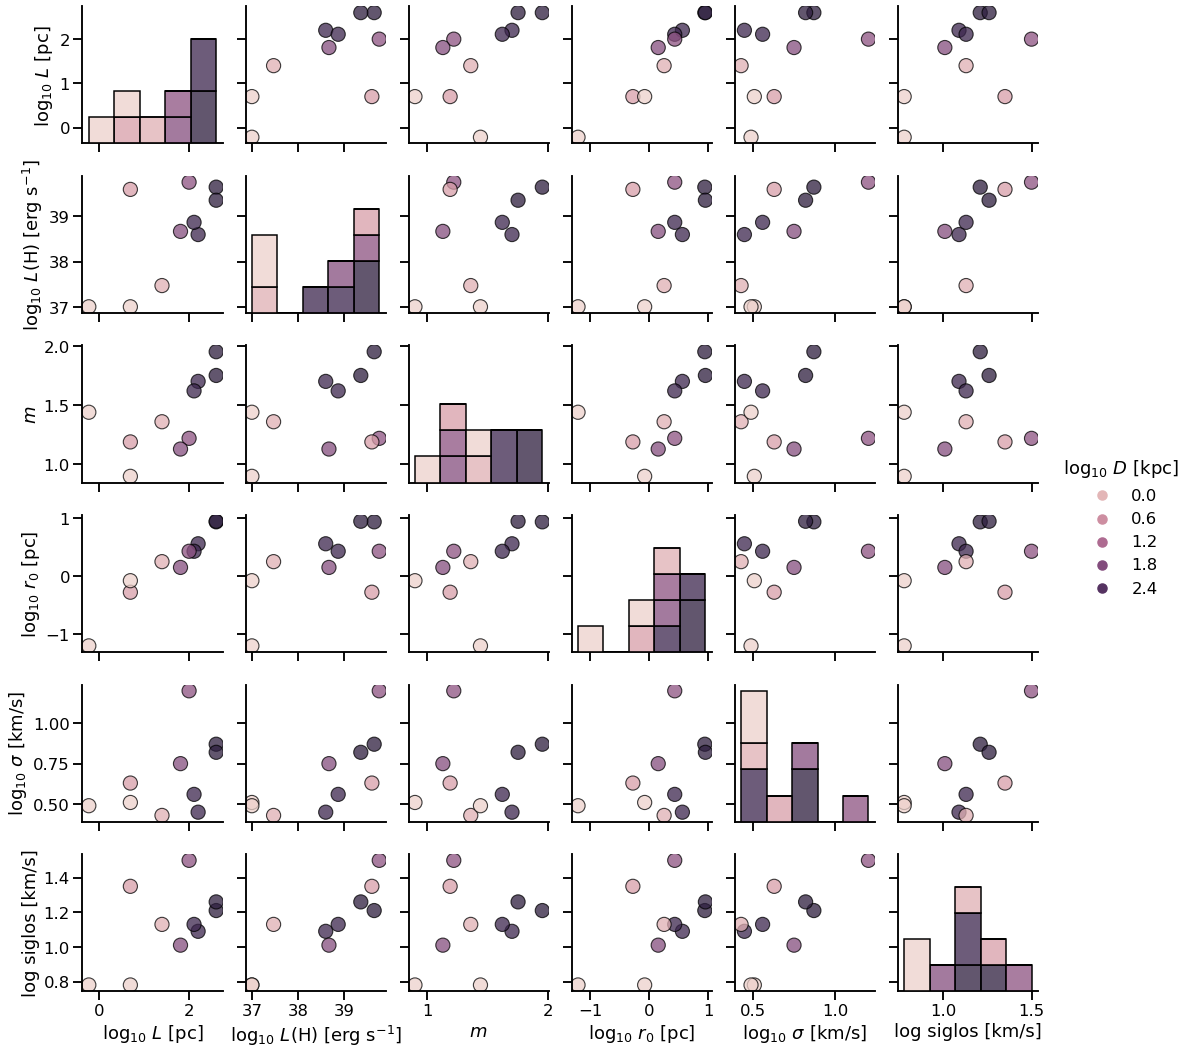

In [12]:
selected_vars = [ "log L [pc]","log L(H) [erg s^-1]", "log Dist [kpc]", "m", "log r0 [pc]", "log sig [km/s]", "log siglos [km/s]"]
plotdata = logdata[selected_vars].rename(
    columns={
        # Switch column names to use latex formatting to improve axis labels
        "log L [pc]": r"$\log_{10}\ L$ [pc]", 
        "log L(H) [erg s^-1]": r"$\log_{10}\ L(\mathrm{H})$ [erg s$^{-1}$]", 
        "m": "$m$", 
        "log r0 [pc]": r"$\log_{10}\ r_0$ [pc]", 
        "log sig [km/s]": r"$\log_{10}\ \sigma$ [km/s]", 
        "log Dist [kpc]": r"$\log_{10}\ D$ [kpc]",
    },
)

sns.pairplot(plotdata, 
             hue=r"$\log_{10}\ D$ [kpc]",
             plot_kws=dict(alpha=0.75, s=200, edgecolor="k"), 
             diag_kind='hist',
             diag_kws= dict(multiple='stack'),
             );

figname = "strucfunc-correlations"
# Save PDF and JPG versions of the figure
#plt.gcf().savefig(f"{figname}.pdf")
#plt.gcf().savefig(f"{figname}.jpg")

## Correlation coefficients

Calculate [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), $r$, between each pair of variables:

In [13]:
logdata[selected_vars].corr()

,log L [pc],log L(H) [erg s^-1],log Dist [kpc],m,log r0 [pc],log sig [km/s],log siglos [km/s]
log L [pc],1.000000,0.674686,0.923364,0.599839,0.965392,0.466705,0.555372
log L(H) [erg s^-1],0.674686,1.000000,0.714755,0.392892,0.620690,0.718054,0.875549
log Dist [kpc],0.923364,0.714755,1.000000,0.725915,0.820690,0.414552,0.477683
m,0.599839,0.392892,0.725915,1.000000,0.523512,0.064443,0.237977
log r0 [pc],0.965392,0.620690,0.820690,0.523512,1.000000,0.417942,0.550610
log sig [km/s],0.466705,0.718054,0.414552,0.064443,0.417942,1.000000,0.685530
log siglos [km/s],0.555372,0.875549,0.477683,0.237977,0.550610,0.685530,1.000000


So the results for correlations between the basic parameters are what we would expect:

- Size is moderately correlated with luminosity ($r = 0.67$).  The correlation is only weak because size will also depend on ambient density and the age of the region. 
- Size is highly correlated with distance ($r = 0.92$).  This is just a selection effect due to the fact that we tend to choose regions that have an angular size that matches our instruments. 
- Luminosity–distance correlation is the weakest ($r = 0.71$), and can be explained as being due to the previous two.



The correlations of the structure function parameters with the basic parameters are very interesting:
- Autocorrelation length scale, $r_0$, is *highly* correlated ($r = 0.96$) with region size, $L$.  Looking at the graph, the relation seems to be approximately linear with $\ell_0 \approx 0.1 L$.  How much of this correlation is real and how much is down to selection effects is something we need to consider carefully.
- Velocity dispersion, $\sigma$, is well correlated ($r = 0.71$) with luminosity, $L(\mathrm{Ha})$.  
- The structure function slope $m$ is well correlated ($r = 0.73$) with distance.  This is mainly because $m \approx 1.6$ for all the distant regions observed with TAURUS and ISIS, but is around $m = 1$ for all the nearby regions.  I suspect that this is mainly a data quality issue: we observe very little of the inertial range in the distant regions, so the determination of $m$ is probably not so reliable.  But I am not sure why this would tend to bias $m$ towards high values.  

In [14]:
logdata[selected_vars].corr()

,log L [pc],log L(H) [erg s^-1],log Dist [kpc],m,log r0 [pc],log sig [km/s],log siglos [km/s]
log L [pc],1.000000,0.674686,0.923364,0.599839,0.965392,0.466705,0.555372
log L(H) [erg s^-1],0.674686,1.000000,0.714755,0.392892,0.620690,0.718054,0.875549
log Dist [kpc],0.923364,0.714755,1.000000,0.725915,0.820690,0.414552,0.477683
m,0.599839,0.392892,0.725915,1.000000,0.523512,0.064443,0.237977
log r0 [pc],0.965392,0.620690,0.820690,0.523512,1.000000,0.417942,0.550610
log sig [km/s],0.466705,0.718054,0.414552,0.064443,0.417942,1.000000,0.685530
log siglos [km/s],0.555372,0.875549,0.477683,0.237977,0.550610,0.685530,1.000000


In [15]:
logdata

,Region,log L(H) [erg s^-1],log SFR,log n,log L [pc],log R [pc],log Dist [kpc],log sig [km/s],log sig2 [km/s],sig2er,m,m2,mer,m2er,log r0 [pc],log r02 [pc],r0er,r02er,log siglos [km/s]
0,NGC 604,39.65,-2.28,0.48,2.60,2.30,2.92,0.87,0.82,2.247221,1.95,2.07,0.14,0.23,0.94,0.84,0.750,0.830,1.21
1,NGC 595,39.36,-2.59,0.60,2.60,2.30,2.92,0.82,0.78,1.833030,1.75,1.83,0.10,0.12,0.95,0.91,0.710,0.850,1.26
2,Hubble X,38.60,-3.51,0.70,2.20,1.90,2.70,0.45,0.55,0.830662,1.70,1.72,0.09,0.16,0.56,0.56,0.180,0.210,1.09
3,Hubble V,38.87,-3.82,0.90,2.11,1.81,2.70,0.56,0.45,0.848528,1.62,1.62,0.11,0.28,0.43,0.44,0.240,0.350,1.13
4,30Dor,39.76,-1.89,2.40,2.00,1.69,1.70,1.20,1.24,5.288667,1.22,1.18,0.02,0.02,0.43,0.53,0.080,0.440,1.50
5,Carina,39.60,-2.00,2.70,0.70,0.88,0.37,0.63,0.65,1.754993,1.19,0.98,0.20,0.37,-0.28,-0.27,0.120,0.180,1.35
6,NGC 346,38.67,-2.68,2.00,1.81,1.51,1.79,0.75,0.79,1.920937,1.13,1.05,0.03,0.04,0.15,0.28,0.750,0.350,1.01
7,M8,37.47,-4.00,1.78,1.40,1.10,0.10,0.43,0.43,0.848528,1.36,1.36,0.05,0.13,0.25,0.25,0.070,0.170,1.13
8,OrionL,37.00,-4.28,2.18,0.70,0.40,-0.40,0.51,0.36,3.507136,0.90,2.17,0.04,1.78,-0.08,-0.22,0.370,1.880,0.78
9,OrionS,37.00,-4.28,3.60,-0.22,-0.52,-0.40,0.49,0.41,0.728011,1.44,1.65,0.11,0.07,-1.21,-1.38,0.003,0.004,0.78


## Significance tests

We can calculate the statistical significance of the correlations by using the Student t-statistic.  We test the null hypothesis that a given pair of variables is truly uncorrelated ($r = 0$) for the underlying population and that the observed $r$ for our sample of $N = 9$ sources arises solely by chance.  We want to calculate the $p$-value, which is the probability of obtaining $r$ greater than or equal to the observed value, given that there is no true correlation.  A small value of $p$ means that the null hypothesis can be rejected at a certain confidence level.  

First we calculate the t-statistic from the Pearson correlation coefficient:
$$
t = r \, \left(\frac{N - 2}{1 - r^2}\right)^{1/2}
$$
Then, we use the cumulative distribution function (CDF) of the t-distribution with $N - 1$ degrees of freedom to find the p-value. 

In [16]:
def tstatistic(r, n):
    """Compute Student t statistic for null hypothesis of no correlation
    for an observed Pearson correlation of `r` from `n` samples
    """
    return r*np.sqrt((n - 2) / (1 - r**2))

In [17]:
import scipy.stats

In [18]:
def p_from_t(t, n):
    """Compute 1-sided p-value from Student statistic `t` with `n` observations"""
    # sf is survival function: 1 - CDF
    return scipy.stats.t.sf(t, n-1)
    

In [19]:
N = 9
rvals = np.array([0.0, 0.2, 0.4, 0.5, 0.6, 0.7, 0.779, 0.8, 0.9, 0.908, 0.95, 0.981])
tvals = tstatistic(rvals, N)
pvals = p_from_t(tvals, N)
pd.DataFrame(
    {"r": rvals, "t": tvals, "p": pvals}
)

,r,t,p
0,0.000,0.000000,5.000000e-01
1,0.200,0.540062,3.019294e-01
2,0.400,1.154701,1.407685e-01
3,0.500,1.527525,8.257494e-02
4,0.600,1.984313,4.124805e-02
5,0.700,2.593355,1.597303e-02
6,0.779,3.287020,5.535582e-03
7,0.800,3.527668,3.879201e-03
8,0.900,5.462793,2.997718e-04
9,0.908,5.733922,2.184923e-04


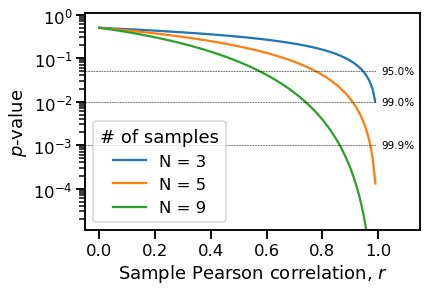

In [20]:
fig, ax = plt.subplots()
for N in 3, 5, 9:
    rvals = np.linspace(0.0, 1.0, 100, endpoint=False)
    tvals = tstatistic(rvals, N)
    pvals = p_from_t(tvals, N)
    ax.plot(rvals, pvals, label=f"N = {N}")
for p0 in 0.05, 0.01, 0.001:
    ax.axhline(p0, color="k", ls="--", lw=0.5)
    ax.text(1.07, p0, f"{100*(1-p0):.1f}%", 
            va="center", ha="center", fontsize="xx-small", 
            bbox={"color": "w"})
ax.legend(title="# of samples")
ax.set(
    xlabel="Sample Pearson correlation, $r$",
    ylabel="$p$-value",
    yscale="log",
    xlim=[-0.05, 1.15],
    ylim=[1.1e-5, 1.1],
);

I have marked confidence levels for nominal $p$-values of 0.05, 0.01, and 0.001, which are often used to judge significance.   This implies that all the correlations that we listed above are highly significant.  For instance, the correlation of $\sigma$ with luminosity, with $r=0.77$, has $p = 0.011$, so close to the 99% confidence level. 

Despite the good correlation, there is a factor of 4 difference in $\sigma$ between Carina and 30~Dor, despite similar luminosities.  **Need to check these luminostiy values**. 

In [21]:
logdata

,Region,log L(H) [erg s^-1],log SFR,log n,log L [pc],log R [pc],log Dist [kpc],log sig [km/s],log sig2 [km/s],sig2er,m,m2,mer,m2er,log r0 [pc],log r02 [pc],r0er,r02er,log siglos [km/s]
0,NGC 604,39.65,-2.28,0.48,2.60,2.30,2.92,0.87,0.82,2.247221,1.95,2.07,0.14,0.23,0.94,0.84,0.750,0.830,1.21
1,NGC 595,39.36,-2.59,0.60,2.60,2.30,2.92,0.82,0.78,1.833030,1.75,1.83,0.10,0.12,0.95,0.91,0.710,0.850,1.26
2,Hubble X,38.60,-3.51,0.70,2.20,1.90,2.70,0.45,0.55,0.830662,1.70,1.72,0.09,0.16,0.56,0.56,0.180,0.210,1.09
3,Hubble V,38.87,-3.82,0.90,2.11,1.81,2.70,0.56,0.45,0.848528,1.62,1.62,0.11,0.28,0.43,0.44,0.240,0.350,1.13
4,30Dor,39.76,-1.89,2.40,2.00,1.69,1.70,1.20,1.24,5.288667,1.22,1.18,0.02,0.02,0.43,0.53,0.080,0.440,1.50
5,Carina,39.60,-2.00,2.70,0.70,0.88,0.37,0.63,0.65,1.754993,1.19,0.98,0.20,0.37,-0.28,-0.27,0.120,0.180,1.35
6,NGC 346,38.67,-2.68,2.00,1.81,1.51,1.79,0.75,0.79,1.920937,1.13,1.05,0.03,0.04,0.15,0.28,0.750,0.350,1.01
7,M8,37.47,-4.00,1.78,1.40,1.10,0.10,0.43,0.43,0.848528,1.36,1.36,0.05,0.13,0.25,0.25,0.070,0.170,1.13
8,OrionL,37.00,-4.28,2.18,0.70,0.40,-0.40,0.51,0.36,3.507136,0.90,2.17,0.04,1.78,-0.08,-0.22,0.370,1.880,0.78
9,OrionS,37.00,-4.28,3.60,-0.22,-0.52,-0.40,0.49,0.41,0.728011,1.44,1.65,0.11,0.07,-1.21,-1.38,0.003,0.004,0.78


In [22]:
logdata['mer']=(data['mer']/data['m'])*0.434

In [23]:
logdata['m2er']=(data['m2er']/data['m2'])*0.434

In [24]:
logdata['r0er']=(data['r0er']/data['r0 [pc]'])*0.434

In [25]:
logdata['r02er']=(data['r02er']/data['r02 [pc]'])*0.434

In [26]:
logdata['sig2er']=(data['sig2er']/data['sig2 [km/s]'])*0.434

In [40]:
logdata

,Region,log L(H) [erg s^-1],log SFR,log n,log L [pc],log R [pc],log Dist [kpc],log sig [km/s],log sig2 [km/s],sig2er,m,m2,mer,m2er,log r0 [pc],log r02 [pc],r0er,r02er,log siglos [km/s]
0,NGC 604,39.65,-2.28,0.48,2.60,2.30,2.92,0.87,0.82,0.147942,1.95,2.07,0.031159,0.048222,0.94,0.84,0.037200,0.052206,1.21
1,NGC 595,39.36,-2.59,0.60,2.60,2.30,2.92,0.82,0.78,0.131570,1.75,1.83,0.024800,0.028459,0.95,0.91,0.034276,0.045883,1.26
2,Hubble X,38.60,-3.51,0.70,2.20,1.90,2.70,0.45,0.55,0.100883,1.70,1.72,0.022976,0.040372,0.56,0.56,0.021580,0.025247,1.09
3,Hubble V,38.87,-3.82,0.90,2.11,1.81,2.70,0.56,0.45,0.131188,1.62,1.62,0.029469,0.075012,0.43,0.44,0.038578,0.054640,1.13
4,30Dor,39.76,-1.89,2.40,2.00,1.69,1.70,1.20,1.24,0.132370,1.22,1.18,0.007115,0.007356,0.43,0.53,0.012907,0.056165,1.50
5,Carina,39.60,-2.00,2.70,0.70,0.88,0.37,0.63,0.65,0.170356,1.19,0.98,0.072941,0.163857,-0.28,-0.27,0.098264,0.144667,1.35
6,NGC 346,38.67,-2.68,2.00,1.81,1.51,1.79,0.75,0.79,0.135224,1.13,1.05,0.011522,0.016533,0.15,0.28,0.232500,0.080370,1.01
7,M8,37.47,-4.00,1.78,1.40,1.10,0.10,0.43,0.43,0.136393,1.36,1.36,0.015956,0.041485,0.25,0.25,0.017067,0.041449,1.13
8,OrionL,37.00,-4.28,2.18,0.70,0.40,-0.40,0.51,0.36,0.662408,0.90,2.17,0.019289,0.356000,-0.08,-0.22,0.191167,1.359867,0.78
9,OrionS,37.00,-4.28,3.60,-0.22,-0.52,-0.40,0.49,0.41,0.122247,1.44,1.65,0.033153,0.018412,-1.21,-1.38,0.021000,0.041333,0.78


r0 vs m

In [27]:
X, Xe, Y, Ye = [logdata[_] for _ in ['log r0 [pc]', 'r0er','m', 'mer']]

In [28]:
Y=np.log10(Y)

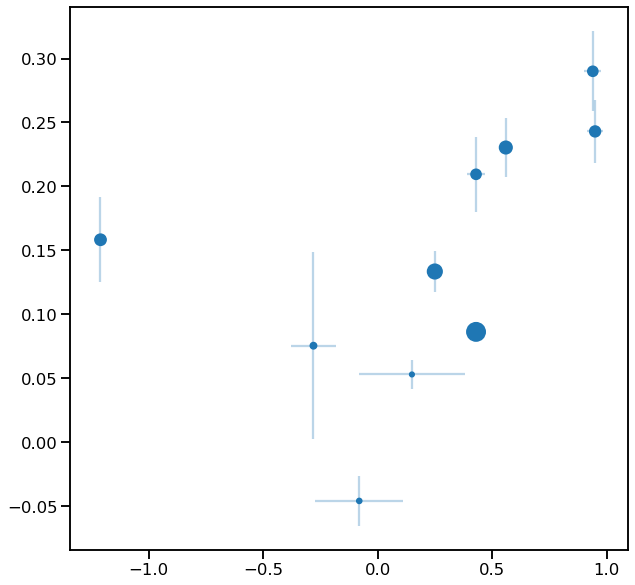

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", alpha=0.3)
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))

#ax.set(
#    xlim=[-0.2, 0.8], ylim=[-0.2, 0.8],
#    xlabel=r"$\log_{10}\, \Pi$", ylabel=r"$\log_{10}\, \Lambda$",
#)
#ax.set_aspect("equal")
#sns.despine()

In [41]:
lm = linmix.LinMix(X[:-1], Y[:-1], Xe[:-1], Ye[:-1], K=2)

In [42]:
lm.run_mcmc()


Iteration:  100
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.0191705  1.0290305  1.00604072 1.00273529 0.99996354 1.00759026]

Iteration:  200
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.02067476 1.03738888 0.99962578 0.9957681  1.00004737 1.02428139]

Iteration:  300
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.01068746 1.01603303 1.00653091 0.99752106 1.00003871 1.0158529 ]

Iteration:  400
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00959155 1.00741607 1.01218258 0.99785802 1.00085087 1.01011993]

Iteration:  500
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00287215 1.00394404 1.00566792 0.99864564 1.00067054 1.00350462]

Iteration:  600
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00071178 1.00154701 1

In [43]:
dfchain = pd.DataFrame.from_records(
    lm.chain.tolist(), 
    columns=lm.chain.dtype.names
)
dfchain

,alpha,beta,sigsqr,pi,mu,tausqr,mu0,usqr,wsqr,ximean,xisig,corr
0,-0.042137,0.404666,0.002294,"[0.8098221910400346, 0.1901778089599654]","[0.2368772678701757, 0.46800831078090877]","[0.0311280050405111, 0.07987070660933691]",0.299433,0.170701,0.082632,0.280833,0.220511,0.881119
1,0.024182,0.265471,0.000852,"[0.568332010362306, 0.4316679896376941]","[0.3730735819848948, 0.5635119592080502]","[0.13816871617587673, 0.31746315521007423]",0.596273,0.113364,0.373481,0.455280,0.473774,0.974102
2,0.047161,0.212002,0.001747,"[0.713878849670985, 0.286121150329015]","[0.07545842373312697, 0.5422947124101486]","[0.12406915937353163, 0.28945083740471644]",0.222913,0.240684,0.379934,0.209030,0.464654,0.920572
3,0.065260,0.195099,0.005083,"[0.7464347757828891, 0.25356522421711086]","[0.10541028081915588, 0.16808913070942777]","[0.3132300210701667, 0.41573188809369915]",-0.070442,0.205614,0.107176,0.121303,0.583065,0.847324
4,0.040173,0.183872,0.006769,"[0.6954730368857501, 0.3045269631142499]","[0.3730552882844738, 0.47782700643518417]","[0.09915029267625168, 0.06858502656821243]",0.132831,0.070520,0.134881,0.404961,0.303590,0.561463
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.042256,0.249477,0.000945,"[0.025929847299849294, 0.9740701527001507]","[0.7214538004079378, 0.08351871179565107]","[0.1703877494934116, 0.2816134186738799]",0.590631,0.153117,0.385136,0.100060,0.537595,0.974719
9996,0.036275,0.252771,0.001587,"[0.01822666944520655, 0.9817733305547933]","[0.10932392747336617, 0.6569136630023801]","[0.13859434999618594, 0.491449927091822]",0.256564,0.151380,0.446403,0.646933,0.700274,0.975599
9997,0.027150,0.286981,0.002960,"[0.012384224713345885, 0.987615775286654]","[-0.4198561342734581, 0.2885682782916632]","[4.947246029851683, 0.602674553885814]",-0.048365,0.247085,0.156388,0.279795,0.814013,0.973939
9998,0.022016,0.212195,0.002082,"[0.0165963202819447, 0.9834036797180553]","[0.5168665287465886, 0.3990733410883506]","[0.5901178855343737, 0.15086311623460433]",0.570219,0.022415,0.030150,0.401028,0.397969,0.879777


In [44]:
dfchain.describe()

,alpha,beta,sigsqr,mu0,usqr,wsqr,ximean,xisig,corr
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.045220,0.240164,0.008259,0.378334,0.117003,0.241360,0.379754,0.730520,0.800099
std,0.050177,0.091241,0.016303,0.335487,0.071465,0.235814,0.179936,6.151762,0.205444
min,-0.549726,-1.075842,0.000350,-1.696364,0.000501,0.000349,-0.922058,0.179152,-0.873645
25%,0.018258,0.192201,0.002898,0.177936,0.055428,0.081587,0.271662,0.407566,0.737526
50%,0.045115,0.241027,0.005021,0.376890,0.109363,0.169209,0.382073,0.497429,0.867067
75%,0.072637,0.288751,0.009153,0.582020,0.174608,0.320359,0.489637,0.632249,0.934499
max,1.035214,1.395197,0.924169,2.215449,0.261063,2.204005,1.763313,586.691624,1.000000


In [45]:
pearsonr(X, Y)

(0.4832385732886732, 0.1571019118870487)

In [46]:
pd.DataFrame({"X": X, "Xe": Xe, "Y": Y, "Ye": Ye}).describe()

,X,Xe,Y,Ye
count,10.000000,10.000000,10.000000,10.000000
mean,0.214000,0.070454,0.143417,0.026838
std,0.636435,0.078903,0.103008,0.018285
min,-1.210000,0.012907,-0.045757,0.007115
25%,-0.022500,0.021145,0.078250,0.016789
50%,0.340000,0.035738,0.145951,0.023888
75%,0.527500,0.083343,0.225215,0.030737
max,0.950000,0.232500,0.290035,0.072941


[(-1.5, 1.1),
 (-0.1, 0.4),
 Text(0.5, 0, 'Velocity correlation length: $\\log_{10} r_0$'),
 Text(0, 0.5, 'Structure function slope: $\\log_{10} m$')]

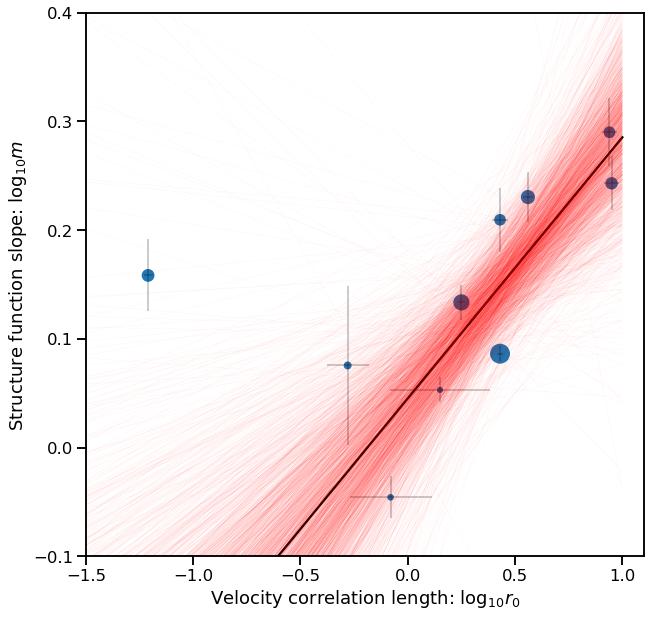

In [48]:
vmin, vmax = -3.0, 1.0
xgrid = np.linspace(vmin, vmax, 200)


fig, ax = plt.subplots(figsize=(10, 10))

ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", elinewidth=0.4, alpha=1.0, c="k")
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))
# The original fit
ax.plot(xgrid, dfchain["alpha"].mean() + xgrid*dfchain["beta"].mean(), 
        '-', c="k")
for samp in lm.chain[::5]:
    ax.plot(xgrid, samp["alpha"] + xgrid*samp["beta"], 
        '-', c="r", alpha=0.2, lw=0.1)
ax.set(
    xlim=[-1.5, 1.1],
    ylim=[-0.1, 0.4],
    xlabel=r"Velocity correlation length: $\log_{10} r_0$",
    ylabel=r"Structure function slope: $\log_{10} m$",
)

In [37]:
dfchain["alpha"].mean(),dfchain["beta"].mean()

(0.12608306354384183, 0.07693051630552793)

In [38]:
dfchain["alpha"].std(),dfchain["beta"].std()

(0.047560452222954235, 0.07424569727505485)

In [39]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      m   R-squared:                       0.226
Model:                            WLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     2.336
Date:                Fri, 17 Sep 2021   Prob (F-statistic):              0.165
Time:                        17:07:37   Log-Likelihood:                 10.059
No. Observations:                  10   AIC:                            -16.12
Df Residuals:                       8   BIC:                            -15.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0654      0.031      2.103      

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Diam(R) vs r0

Sig Fixed

In [40]:
X, Y, Ye = [logdata[_] for _ in ['log L [pc]', 'log r0 [pc]', 'r0er']]

In [41]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:            log r0 [pc]   R-squared:                       0.966
Model:                            WLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     229.3
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           3.58e-07
Time:                        17:07:37   Log-Likelihood:                 2.2168
No. Observations:                  10   AIC:                           -0.4336
Df Residuals:                       8   BIC:                            0.1716
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9601      0.088    -10.952      0.0

Sig Float

In [42]:
X, Y, Ye = [logdata[_] for _ in ['log L [pc]', 'log r02 [pc]', 'r02er']]

In [43]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:           log r02 [pc]   R-squared:                       0.970
Model:                            WLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     259.4
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           2.22e-07
Time:                        17:07:37   Log-Likelihood:                 2.6808
No. Observations:                  10   AIC:                            -1.362
Df Residuals:                       8   BIC:                           -0.7564
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0990      0.096    -11.437      0.0

L vs sig

sig fixed

In [44]:
X, Y = [logdata[_] for _ in ['log L(H) [erg s^-1]', 'log sig [km/s]']]

In [45]:
x,y=X,Y
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         log sig [km/s]   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     8.515
Date:                Fri, 17 Sep 2021   Prob (F-statistic):             0.0193
Time:                        17:07:37   Log-Likelihood:                 4.1459
No. Observations:                  10   AIC:                            -4.292
Df Residuals:                       8   BIC:                            -3.687
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -5.5409    

sig float

In [46]:
X, Y, Ye = [logdata[_] for _ in ['log L(H) [erg s^-1]', 'log sig2 [km/s]', 'sig2er']]

In [47]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:        log sig2 [km/s]   R-squared:                       0.552
Model:                            WLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     9.876
Date:                Fri, 17 Sep 2021   Prob (F-statistic):             0.0138
Time:                        17:07:37   Log-Likelihood:                 2.4076
No. Observations:                  10   AIC:                           -0.8153
Df Residuals:                       8   BIC:                           -0.2101
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -7.2039    

Distance (D) vs m

Sigma fixed

In [48]:
X, Y, Ye = [logdata[_] for _ in ['log Dist [kpc]', 'm', 'mer']]

In [49]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      m   R-squared:                       0.276
Model:                            WLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     3.056
Date:                Fri, 17 Sep 2021   Prob (F-statistic):              0.119
Time:                        17:07:38   Log-Likelihood:               -0.99399
No. Observations:                  10   AIC:                             5.988
Df Residuals:                       8   BIC:                             6.593
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.0753      0.131      8.

Sigma Float

In [50]:
X, Y, Ye = [logdata[_] for _ in ['log Dist [kpc]', 'm2', 'm2er']]

In [51]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                     m2   R-squared:                       0.030
Model:                            WLS   Adj. R-squared:                 -0.092
Method:                 Least Squares   F-statistic:                    0.2439
Date:                Fri, 17 Sep 2021   Prob (F-statistic):              0.635
Time:                        17:07:38   Log-Likelihood:                -7.9126
No. Observations:                  10   AIC:                             19.83
Df Residuals:                       8   BIC:                             20.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3534      0.183      7.

sig vs siglos

In [52]:
X, Y, Ye = [logdata[_] for _ in ['log siglos [km/s]', 'log sig2 [km/s]', 'sig2er']]

In [53]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:        log sig2 [km/s]   R-squared:                       0.560
Model:                            WLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     10.19
Date:                Fri, 17 Sep 2021   Prob (F-statistic):             0.0128
Time:                        17:07:38   Log-Likelihood:                 2.4954
No. Observations:                  10   AIC:                           -0.9907
Df Residuals:                       8   BIC:                           -0.3856
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4318      0.34

L vs siglos

In [54]:
Moiseev=pd.read_csv('DataOthers//Moiseev2015.csv')
Ostin=pd.read_csv('DataOthers//Ostin2001.csv')
Blasco=pd.read_csv('DataOthers//Blasco2013.csv')
Rozas=pd.read_csv('DataOthers//Rozas2006.csv')
Ars=pd.read_csv('DataOthers//ArsRoy1986.csv')
Wis=pd.read_csv('DataOthers//Wis2012.csv')
Gal=pd.read_csv('DataOthers//Gallagher1983.csv')

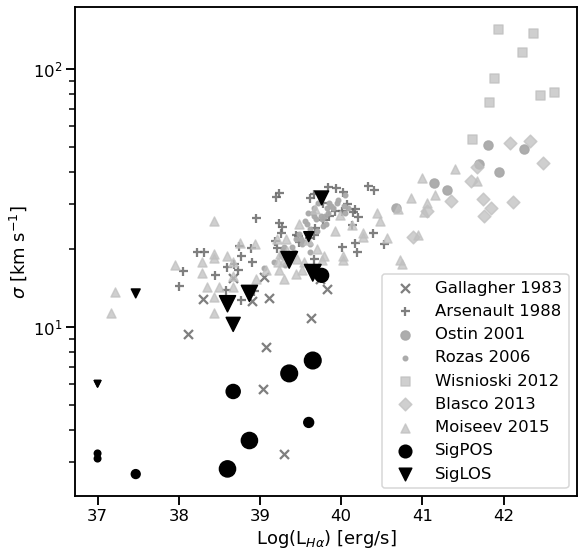

In [55]:
fig, ax=plt.subplots(figsize=(9,9))

plt.scatter(Gal.L,Gal.sig,label='Gallagher 1983',marker='x',alpha=0.85,color='dimgray')
plt.scatter(Ars.L,10**Ars.sig,label='Arsenault 1988',marker='+',alpha=0.85,color='dimgray')
plt.scatter(Ostin.L,Ostin.sig,label='Ostin 2001',marker='o',alpha=0.95,color='darkgray')
plt.scatter(Rozas.L,10**(Rozas.sig),label='Rozas 2006',marker='.',alpha=0.95,color='darkgray')
plt.scatter(Wis.L,Wis.sig,label='Wisnioski 2012',marker='s',alpha=0.75,color='silver')
plt.scatter(Blasco.L,Blasco.sig,label='Blasco 2013',marker='D',alpha=0.75,color='silver')
plt.scatter(Moiseev.L,Moiseev.sig,label='Moiseev 2015',marker='^',alpha=0.75,color='silver')

plt.scatter(logdata['log L(H) [erg s^-1]'],10**(logdata['log sig [km/s]']),marker='o',label='SigPOS',color='black',s=(logdata['log Dist [kpc]']+1.0)*70)
plt.scatter(logdata['log L(H) [erg s^-1]'],10**(logdata['log siglos [km/s]']),marker='v',label='SigLOS',color='black',s=(logdata['log Dist [kpc]']+1.0)*70)

plt.yscale('log')

ax.set(
#    ylim  = [36, 43],
#    xlim  = [1, 150],
)
#ax.set_facecolor('whitesmoke')
ax.set(xlabel='Log(L$_{Hα}$) [erg/s]', ylabel='$σ$ [km s$^{-1}$]')
plt.legend()
#fig.savefig('SFplots//lvss.pdf', bbox_inches='tight')


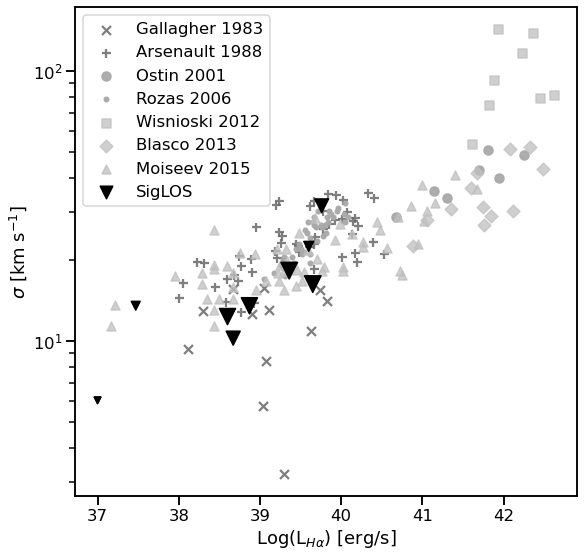

In [56]:
fig, ax=plt.subplots(figsize=(9,9))

plt.scatter(Gal.L,Gal.sig,label='Gallagher 1983',marker='x',alpha=0.85,color='dimgray')
plt.scatter(Ars.L,10**Ars.sig,label='Arsenault 1988',marker='+',alpha=0.85,color='dimgray')
plt.scatter(Ostin.L,Ostin.sig,label='Ostin 2001',marker='o',alpha=0.95,color='darkgray')
plt.scatter(Rozas.L,10**(Rozas.sig),label='Rozas 2006',marker='.',alpha=0.95,color='darkgray')
plt.scatter(Wis.L,Wis.sig,label='Wisnioski 2012',marker='s',alpha=0.75,color='silver')
plt.scatter(Blasco.L,Blasco.sig,label='Blasco 2013',marker='D',alpha=0.75,color='silver')
plt.scatter(Moiseev.L,Moiseev.sig,label='Moiseev 2015',marker='^',alpha=0.75,color='silver')

#plt.scatter(logdata['log L(H) [erg s^-1]'],10**(logdata['log sig [km/s]']),marker='o',label='SigPOS',color='black',s=(logdata['log Dist [kpc]']+1.0)*70)
plt.scatter(logdata['log L(H) [erg s^-1]'],10**(logdata['log siglos [km/s]']),marker='v',label='SigLOS',color='black',s=(logdata['log Dist [kpc]']+1.0)*70)

plt.yscale('log')

ax.set(
#    ylim  = [36, 43],
#    xlim  = [1, 150],
)
#ax.set_facecolor('whitesmoke')
ax.set(xlabel='Log(L$_{Hα}$) [erg/s]', ylabel='$σ$ [km s$^{-1}$]')
plt.legend()
#fig.savefig('SFplots//lvss.pdf', bbox_inches='tight')

In [57]:
globalL= pd.concat([Moiseev.L, Ostin.L.dropna(),Blasco.L.dropna(),Rozas.L.dropna(),Ars.L.dropna(),Wis.L.dropna(),Gal.L.dropna()], axis=0)
globalS= pd.concat([Moiseev.sig, Ostin.sig.dropna(),Blasco.sig.dropna(),10**Rozas.sig.dropna(),10**Ars.sig.dropna(),Wis.sig.dropna(),Gal.sig.dropna()],  axis=0)
GL=np.concatenate((np.array(globalL), np.array(logdata['log L(H) [erg s^-1]'])))
GS=np.concatenate((np.array(globalS), np.array(10**(logdata['log siglos [km/s]']))))

[Text(0, 0.5, 'Log$σ$ [km s$^{-1}$]'), Text(0.5, 0, 'Log(L$_{Hα}$) [erg/s]')]

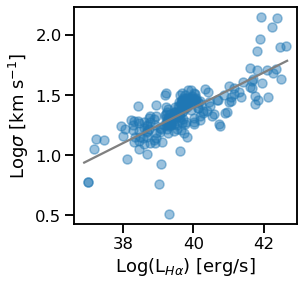

In [58]:
fig, ax=plt.subplots(figsize=(4,4))


plt.scatter(GL, np.log10(GS),alpha=0.45)

x2=np.logspace(1.567,1.63)
y2=-4.4928+0.1472*x2
plt.plot(x2,y2, color='gray')

ax.set(xlabel='Log(L$_{Hα}$) [erg/s]', ylabel='Log$σ$ [km s$^{-1}$]')


In [59]:
GSer = (GS*.1)/GS

In [60]:
GLer = (GL*.1)/GL

In [61]:
X, Xe, Y, Ye = [GL, GLer, np.log10(GS), GSer]

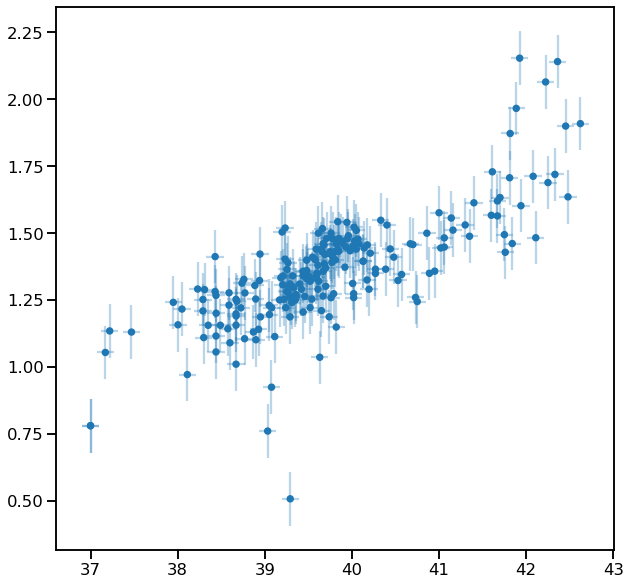

In [62]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", alpha=0.3)
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))
#plt.xscale('log')
#plt.yscale('log')

In [63]:
lm = linmix.LinMix(X, Y, Xe, Ye, K=2)

In [64]:
lm.run_mcmc()


Iteration:  100
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.08300258 1.08589826 1.07856351 0.99130863 1.00088892 1.00197107]

Iteration:  200
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.06963963 1.07179419 1.02053341 0.99511914 1.00258295 1.02217495]

Iteration:  300
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.02016905 1.02088902 1.00156609 1.00010656 0.99751969 1.00104292]

Iteration:  400
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.02199048 1.02298017 1.00173281 1.00277805 0.99974696 1.00243494]

Iteration:  500
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.01016276 1.01068566 0.99832428 1.00151777 1.00004147 0.99919415]

Iteration:  600
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00629809 1.00666526 0

In [65]:
dfchain = pd.DataFrame.from_records(
    lm.chain.tolist(), 
    columns=lm.chain.dtype.names
)
dfchain

,alpha,beta,sigsqr,pi,mu,tausqr,mu0,usqr,wsqr,ximean,xisig,corr
0,-4.853582,0.156230,0.007936,"[0.4431606839748247, 0.5568393160251752]","[39.58513780366021, 40.09044725455818]","[0.23709960185230883, 2.2725378566264576]",39.259135,0.284659,0.403070,39.866514,1.197297,0.902839
1,-4.717783,0.152997,0.009479,"[0.4550113775422803, 0.5449886224577197]","[39.57680105343637, 39.93749720132611]","[0.17378566999117745, 1.8836472886723534]",39.472213,0.270261,0.762915,39.773376,1.066725,0.858796
2,-4.533048,0.147987,0.007679,"[0.3884046306332705, 0.6115953693667294]","[39.53360754427074, 39.97445000783504]","[0.2657740112184925, 1.9330630247298475]",40.091799,0.238403,0.360815,39.803225,1.153969,0.889703
3,-4.826105,0.155446,0.006991,"[0.43185017000585785, 0.5681498299941421]","[39.384698744498294, 40.09359124383405]","[0.22663880870148198, 1.698562227407481]",39.760474,0.119058,0.329844,39.787456,1.089133,0.896618
4,-4.727419,0.153155,0.006087,"[0.45207831070728566, 0.5479216892927143]","[39.5530777588416, 39.76699823893624]","[0.1697913837875813, 1.9148502834608538]",39.867455,0.076247,0.144621,39.670289,1.066434,0.902342
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-4.412108,0.144926,0.007065,"[0.5196847142892876, 0.48031528571071236]","[40.19089941452618, 39.38600857944621]","[1.7737111454124723, 0.2578292076165328]",40.132983,0.634033,0.833357,39.804298,1.098782,0.884370
9996,-4.763183,0.154371,0.007221,"[0.4977442144960069, 0.5022557855039931]","[40.02585688226792, 39.45152697793397]","[1.973610822474353, 0.29095734255301886]",39.086853,0.367317,1.055317,39.737396,1.100432,0.894351
9997,-4.801023,0.155285,0.007228,"[0.539782518008877, 0.460217481991123]","[39.89449864708678, 39.44158295850461]","[2.7172814683410618, 0.22081270946078882]",39.482570,0.238740,0.964421,39.686059,1.272526,0.918593
9998,-4.944676,0.158565,0.006060,"[0.47462635919229795, 0.5253736408077021]","[40.032207310990266, 39.46082260784167]","[2.222096246157604, 0.2431474091627546]",40.031811,0.490399,0.878559,39.732017,1.124197,0.916422


In [66]:
dfchain.describe()

,alpha,beta,sigsqr,mu0,usqr,wsqr,ximean,xisig,corr
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-4.539604,0.148404,0.007867,39.739649,0.526176,0.649005,39.741284,1.107998,0.879202
std,0.348215,0.008759,0.001816,0.523954,0.441025,0.551474,0.077813,0.072444,0.029127
min,-6.055300,0.116134,0.002932,37.095544,0.001518,0.003845,39.448821,0.880121,0.713548
25%,-4.776304,0.142543,0.006595,39.456244,0.181368,0.264557,39.689143,1.058281,0.861328
50%,-4.543596,0.148486,0.007761,39.732335,0.387926,0.501485,39.740357,1.104656,0.881227
75%,-4.306936,0.154361,0.009000,40.016377,0.754316,0.871746,39.793381,1.153564,0.899793
max,-3.254078,0.186753,0.017508,42.664502,1.833190,7.090030,40.071650,1.472518,0.964266


In [67]:
pearsonr(X, Y)

(0.77510211505142, 3.80228362815389e-42)

In [68]:
pd.DataFrame({"X": X, "Xe": Xe, "Y": Y, "Ye": Ye}).describe()

,X,Xe,Y,Ye
count,204.000000,2.040000e+02,204.000000,2.040000e+02
mean,39.750147,1.000000e-01,1.359637,1.000000e-01
std,1.105695,9.759273e-17,0.210025,9.751979e-17
min,37.000000,1.000000e-01,0.506911,1.000000e-01
25%,39.156000,1.000000e-01,1.252489,1.000000e-01
50%,39.640500,1.000000e-01,1.349277,1.000000e-01
75%,40.148700,1.000000e-01,1.460000,1.000000e-01
max,42.622000,1.000000e-01,2.153357,1.000000e-01


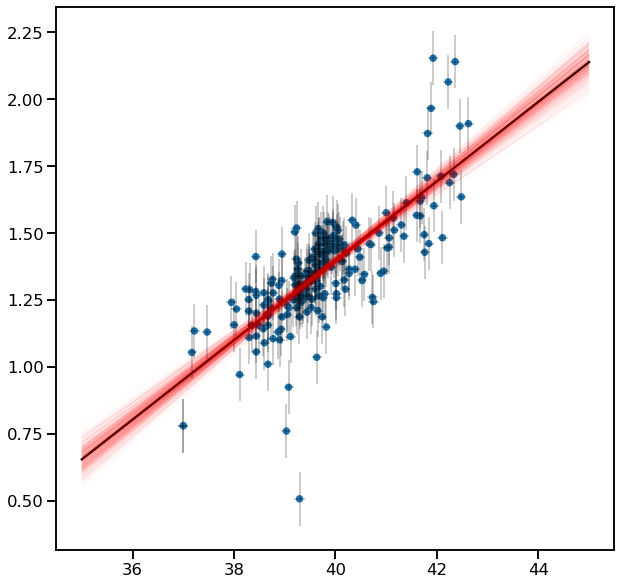

In [69]:
vmin, vmax = 35, 45
xgrid = np.linspace(vmin, vmax, 200)


fig, ax = plt.subplots(figsize=(10, 10))

ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", elinewidth=0.4, alpha=1.0, c="k")
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))
# The original fit
ax.plot(xgrid, dfchain["alpha"].mean() + xgrid*dfchain["beta"].mean(), 
        '-', c="k")
for samp in lm.chain[::20]:
    ax.plot(xgrid, samp["alpha"] + xgrid*samp["beta"], 
        '-', c="r", alpha=0.2, lw=0.1)

In [70]:
dfchain["alpha"].mean(),dfchain["beta"].mean()

(-4.5396044151187835, 0.14840386906105482)

In [71]:
dfchain["alpha"].std(),dfchain["beta"].std()

(0.3482149829829263, 0.008759333665730687)

In [72]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.601
Model:                            WLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     304.0
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           3.80e-42
Time:                        17:08:00   Log-Likelihood:                 123.05
No. Observations:                 204   AIC:                            -242.1
Df Residuals:                     202   BIC:                            -235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4928      0.336    -13.380      0.0

In [73]:
Y, Ye, X, Xe = [GL, GLer, np.log10(GS), GSer]

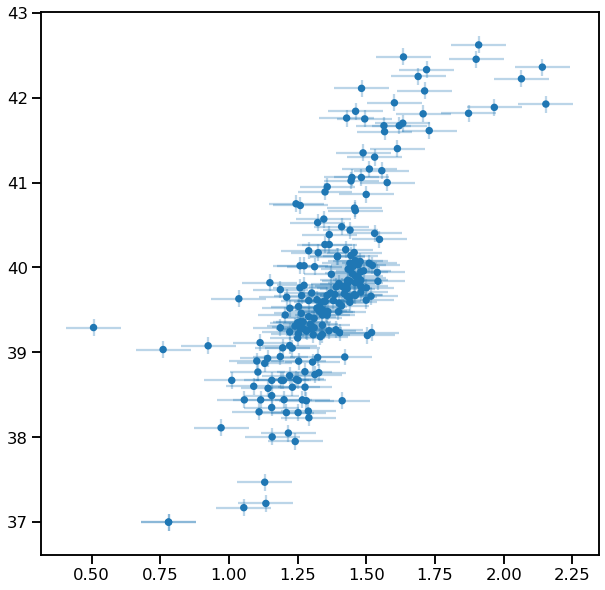

In [74]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", alpha=0.3)
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))

In [75]:
lm = linmix.LinMix(X, Y, Xe, Ye, K=2)

In [76]:
lm.run_mcmc()


Iteration:  100
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00588192 1.01382115 1.11143411 1.04209605 1.01995844 1.07079372]

Iteration:  200
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00206612 1.00427532 1.06480028 1.0005284  0.99884141 1.03266055]

Iteration:  300
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00992654 1.01065534 1.03528362 1.00893847 0.99825651 1.02618816]

Iteration:  400
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00713297 1.00663599 1.02087047 1.00045216 0.9980374  1.01673834]

Iteration:  500
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.01433526 1.01463236 1.03938092 1.00086464 0.99928413 1.03295716]

Iteration:  600
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00753032 1.00811453 1

In [77]:
dfchain = pd.DataFrame.from_records(
    lm.chain.tolist(), 
    columns=lm.chain.dtype.names
)
dfchain

,alpha,beta,sigsqr,pi,mu,tausqr,mu0,usqr,wsqr,ximean,xisig,corr
0,32.783059,5.069818,0.273909,"[0.5974725690211676, 0.4025274309788323]","[1.3165353700327778, 1.4146801494153451]","[0.00667409629232448, 0.0650531688631865]",1.345988,0.003659,0.017461,1.356041,0.180249,0.867763
1,33.016806,4.937586,0.309088,"[0.5061899335328754, 0.49381006646712455]","[1.3099281831836125, 1.3916452356219826]","[0.008100514347807269, 0.08367223903424609]",1.319823,0.004219,0.011070,1.350281,0.216997,0.887621
2,33.483500,4.631969,0.280594,"[0.5858900633729666, 0.4141099366270334]","[1.2958635343567324, 1.4091271449532732]","[0.0074942319604470115, 0.08207974658454907]",1.397399,0.023714,0.013161,1.342767,0.203699,0.871979
3,32.657387,5.207060,0.263671,"[0.5684700908299866, 0.43152990917001344]","[1.2911774322097942, 1.4574500579953724]","[0.007774680619259524, 0.05870660039538558]",1.438746,0.064042,0.022459,1.362929,0.191142,0.888697
4,32.495028,5.384814,0.216953,"[0.5412367277593737, 0.4587632722406263]","[1.3026354465718115, 1.450652168095509]","[0.008508469346732472, 0.06314004794064107]",1.099788,0.027303,0.017520,1.370540,0.197513,0.916009
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32.691893,5.237090,0.303275,"[0.4505202707273674, 0.5494797292726327]","[1.4222566935731462, 1.3222899984835945]","[0.0539142173547947, 0.003421404559891006]",1.338243,0.004468,0.007814,1.367327,0.169243,0.849400
9996,32.926432,5.077611,0.317926,"[0.5042651478958925, 0.49573485210410745]","[1.3801712252522775, 1.3165621221262243]","[0.06464560213358915, 0.004328878477301929]",1.395823,0.030269,0.022855,1.348638,0.189092,0.862302
9997,33.275936,4.754678,0.354113,"[0.4506355101814191, 0.5493644898185809]","[1.399340446990438, 1.3188804094029734]","[0.057554973160470826, 0.005326239503856704]",1.128152,0.026929,0.001250,1.355139,0.174542,0.812670
9998,32.959511,5.008577,0.363312,"[0.39231879743211623, 0.6076812025678837]","[1.414110493743763, 1.3317796951588035]","[0.06227562230273481, 0.006589687491760259]",1.464754,0.006080,0.011553,1.364080,0.173356,0.821463


In [78]:
dfchain.describe()

,alpha,beta,sigsqr,mu0,usqr,wsqr,ximean,xisig,corr
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,32.789981,5.118780,0.311754,1.374165,0.019189,0.023690,1.358110,0.188474,0.863264
std,0.485307,0.356080,0.065066,0.103980,0.016252,0.020431,0.014949,0.016245,0.034490
min,30.744988,3.823129,0.106569,0.890812,0.000057,0.000088,1.303435,0.138023,0.684722
25%,32.477206,4.881680,0.266379,1.317623,0.006396,0.009360,1.348102,0.177431,0.842481
50%,32.796199,5.113768,0.308435,1.370147,0.013886,0.017908,1.357840,0.187337,0.866174
75%,33.114825,5.348108,0.352582,1.427516,0.028058,0.031735,1.368156,0.198440,0.887733
max,34.556397,6.594794,0.592792,2.132606,0.066102,0.220173,1.433748,0.331542,0.961135


In [79]:
pearsonr(X, Y)

(0.77510211505142, 3.80228362815389e-42)

In [80]:
pd.DataFrame({"X": X, "Xe": Xe, "Y": Y, "Ye": Ye}).describe()

,X,Xe,Y,Ye
count,204.000000,2.040000e+02,204.000000,2.040000e+02
mean,1.359637,1.000000e-01,39.750147,1.000000e-01
std,0.210025,9.751979e-17,1.105695,9.759273e-17
min,0.506911,1.000000e-01,37.000000,1.000000e-01
25%,1.252489,1.000000e-01,39.156000,1.000000e-01
50%,1.349277,1.000000e-01,39.640500,1.000000e-01
75%,1.460000,1.000000e-01,40.148700,1.000000e-01
max,2.153357,1.000000e-01,42.622000,1.000000e-01


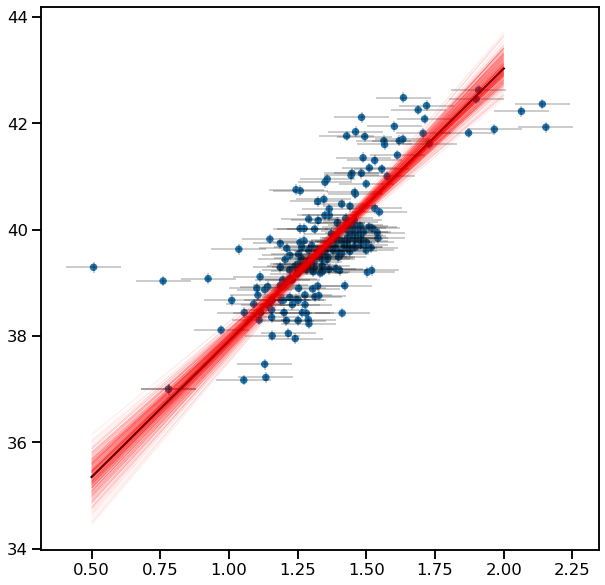

In [81]:
vmin, vmax = 0.5, 2
xgrid = np.linspace(vmin, vmax, 200)


fig, ax = plt.subplots(figsize=(10, 10))

ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", elinewidth=0.4, alpha=1.0, c="k")
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))
# The original fit
ax.plot(xgrid, dfchain["alpha"].mean() + xgrid*dfchain["beta"].mean(), 
        '-', c="k")
for samp in lm.chain[::20]:
    ax.plot(xgrid, samp["alpha"] + xgrid*samp["beta"], 
        '-', c="r", alpha=0.4, lw=0.1)


In [82]:
dfchain["alpha"].mean(),dfchain["beta"].mean()

(32.78998117491929, 5.118780019530615)

In [83]:
dfchain["alpha"].std(),dfchain["beta"].std()

(0.48530747948771197, 0.35607968605506213)

In [84]:
print("--- %s seconds ---" % (time.time()-start_time))


--- 69.717036485672 seconds ---
